In [39]:
import numpy as np
import sys
from scipy.spatial import distance

# generate random orders
def RandomlizeOrder(size):
    # 1,2: origin location
    # 3,4: destination
    # 5: ready by pickup time
    # 6: restaurant number
    # 7: ordertime
    res = []
    for i in range(size):
        res += [(np.random.randint(100),np.random.randint(100),np.random.randint(100),np.random.randint(100),np.random.randint(30),np.random.randint(10), np.random.randint(30))]
    return res

# generate random courier locations
def RandomlizeCourier(size):
    # 1,2: courier geolocation
    res = []
    for i in range(size):
        res += [(np.random.randint(100),np.random.randint(100))]
    return res

# sort order by starting time
def sortOrders(orders):
    orders.sort(key=lambda x: x[4])

# simulate a travel time between restaurant and couriers
# call google api for accurate estimation in the future
def getDistance(couriers,orders):
    return np.random.randint(100)

# batching algorithm for initial batching
# loop through the orders and assign the each order to the closest courier one at a time
def initBatch(orders, couriers):
    batch = []
    assigned = set()
    for i in range(len(couriers)):
        minDis = sys.maxsize
        assign = -1
        for j in range(len(orders)):
            dis = getDistance(couriers, orders)
            if (dis < minDis and j not in assigned):
                assign = j
                minDis = dis
        assigned.add(assign)
        batch += [[assign]]
    return batch

# initial the batch by lookingforward orders that become ready within 20 mins and assign them 
# greedily to each courier's batch
def assignGreedy(orders, couriers, batches):
    assignedOrder = set()
    for batch in batches:
        assignedOrder.add(batch[0])
        
    for batch in batches:
        assigned = set()
        MaxTime = 0
        for b in batch:
            if (orders[b][4] > MaxTime):
                MaxTime = orders[b][4]
            assigned.add(orders[b][5])
        for i in range(len(orders)):
            order = orders[i]
            if (order[5] in assigned) and (order[4] < MaxTime + 20) and i not in assignedOrder:
                batch += [i]
                assignedOrder.add(i)
                assigned.add(order[5])

# calculate the total delivery time of the order batch
def getTime(batches, couriers, orders):
    newBatches = []
    Time = []
    for i in range(len(batches)):
        orderTime = []
        batch = batches[i]
        for b in batch:
            orderTime += [orders[b][6]]
        Time += [orderTime]
        
    for i in range(len(Time)):
        Y = Time[i]
        X = batches[i]
        Z = [x for _,x in sorted(zip(Y,X))]
        newBatches += [Z]
    return newBatches
        
# add the meal shuttle frequency
def mealShuttle(batches):
    return 5

# calculate the euclidean distance
def dis(x1,y1,x2,y2):
    return distance.euclidean((x1,y1), (x2,y2))

# objective function
# assign a score according to the overall lateness of each batch
# return the total distance travelled by all couriers
def score(batches, orders, couriers):
    # the objective function = delivery time + c * orders in batch (lateness)
    score = 0
    for i in range(len(batches)):
        score += dis(couriers[i][0], couriers[i][1], orders[batches[i][0]][2], orders[batches[i][0]][3])
        for j in range(1, len(batches[i])):
            preRestaurant = orders[batches[i][j-1]]
            curRestaurant = orders[batches[i][j]]
            score += dis(preRestaurant[2], preRestaurant[3], curRestaurant[2], curRestaurant[3])   
    return score

# trip swap
# perform three kinds of swap and see if the batch are scored higher
# at each iteration, perform the swap that most improves the objective
def swap():
    return 0

# swap an order in Batch A with an order in batch B
def swapOne():
    return 0

# remove an order from batch A and add it to batch B
def swapTwo():
    return 0

# remove an order from batch A and create a new batch
def swapThree():
    return 0

In [48]:
import numpy as np
import sys
import math

# generate random orders
def RandomlizeOrder(size):
    # 1,2: origin location
    # 3,4: destination
    # 5: ready by pickup time
    # 6: restaurant number
    # 7: ordertime
    res = []
    for i in range(size):
        res += [(np.random.randint(100),np.random.randint(100),np.random.randint(100),np.random.randint(100),np.random.randint(30),np.random.randint(10), np.random.randint(30))]
    return res

# generate random courier locations
def RandomlizeCourier(size):
    # 1,2: courier geolocation
    res = []
    for i in range(size):
        res += [(np.random.randint(100),np.random.randint(100))]
    return res
                     
                     
# generate total delivery time for all the orders
def DeliveryTime(orders):
    orders.sort(key=lambda x: x[4])
    delivery_time = []
    for order in orders:
        dist = math.sqrt((order[0]-order[2])**2 + (order[1]-order[3])**2)
        delivery_time.append(dist)
    return delivery_time

# get adjacent distances sum between orders
def AdjacentDistance(orders, start, end):
    res = 0.0
    for i in range(start, end):
        res += math.sqrt((orders[i][0]-orders[i+1][0])**2 + (orders[i][1]-orders[i+1][1])**2)
    return res;
    
# assume we have n orders and m couriers
# the function below will return the min
def Assignment(delivery_times, couriers, orders):
    m = len(delivery_times)
    n = len(couriers)
        
    res = [[sys.maxsize for x in range(n)] for x in range(m)]
    res[0][0] = 0
    for k in range(1,n):
        for i in range(1,m):
            for j in range(0,i):
                res[i][k] = min(res[i][k], AdjacentDistance(orders,k,i) + delivery_times[i] + res[j][k-1])
    return res[m-1][n-1]
        
##dp[i][m] = min(distance sum from k to i + delivery_time[i]+dp[k][m-1])    

In [59]:
old = []
new = []
o = []
for i in range(40,260,20):
    o += [i]
    orders = RandomlizeOrder(int(i))
    couriers = RandomlizeCourier(int(i/20))
    dt = DeliveryTime(orders)

    res = Assignment(dt,couriers,orders)
    old += [res]
    
    sortOrders(orders)
    batch = initBatch(orders, couriers)
    assignGreedy(orders,couriers, batch)
    newBatch = getTime(batch, couriers, orders)
    result = score(newBatch, orders, couriers)
    new += [result]

print(old)
print(new)

[2199.521720913299, 3348.9569257495696, 4353.6338874151925, 5311.002392758579, 6273.994838131525, 7493.547495465735, 8307.186298767123, 9104.138830192092, 10932.186642332974, 11461.209719435574, 13444.26280188457]
[624.29150397572516, 654.92918003382715, 2284.488006761012, 1841.5391394954509, 2619.9264549635864, 3125.7239156763444, 4796.623424127627, 4558.7945482365285, 5761.1466745772959, 8058.4839682743223, 10316.962457299411]


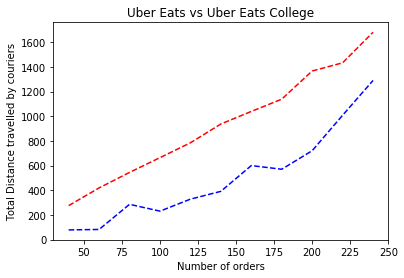

In [64]:
import numpy as np
import matplotlib.pyplot as plt
old = [i/8 for i in old]
new = [i/8 for i in new]
plt.plot(o, old, 'r--', o, new, 'b--')
plt.title('Uber Eats vs Uber Eats College')
plt.xlabel('Number of orders')
plt.ylabel('Total Distance travelled by couriers')
plt.show()

In [30]:
print("************************************")
print("Starting dispatching algorithm...")

numCouriers = input("Enter the number of the couriers ")
couriers = RandomlizeCourier(int(numCouriers))
print("************************************")
print("Initializing " + str(numCouriers) + " couriers....")
print()

numOrders = input("Enter the number of the orders ")
orders = RandomlizeOrder(int(numOrders))
print("************************************")
print("Initializing " + str(numOrders) +  " orders....")
print()

sortOrders(orders)
batch = initBatch(orders, couriers)

print("************************************")
print("Assigning orders according to their distance to the couriers...")
print("This is the first batch for first order:")
print(batch)
print()

print("************************************")
print("Assigning greedy algorithm to complete the initial batches...")
assignGreedy(orders,couriers, batch)
for i in range(len(couriers)):
    print("couriers " + str(i) + " got the following orders:")
    print(batch[i])
print()
print("************************************")
print("sorting by arrival time")
newBatch = getTime(batch, couriers, orders)
print("The new Batch is: ")
for i in range(len(couriers)):
    print("couriers " + str(i) + " got the following orders:")
    print(newBatch[i])
    
print("************************************")
print("performing swaps between batches -------- not yet implemented")  
print("************************************")
print("sorting by arrival time")    
score(newBatch, orders, couriers)

************************************
Starting dispatching algorithm...
Enter the number of the couriers 10
************************************
Initializing 10 couriers....

Enter the number of the orders 100
************************************
Initializing 100 orders....

************************************
Assigning orders according to their distance to the couriers...
This is the first batch for first order:
[[37], [1], [35], [46], [5], [66], [23], [48], [76], [0]]

************************************
Assigning greedy algorithm to complete the initial batches...
couriers 0 got the following orders:
[37, 6, 9, 26, 27, 32, 42, 53, 55, 56, 61, 74, 78, 83, 86]
couriers 1 got the following orders:
[1, 18, 40, 57, 62]
couriers 2 got the following orders:
[35, 7, 14, 41, 93]
couriers 3 got the following orders:
[46, 11, 15, 38, 39, 44, 67, 69, 73]
couriers 4 got the following orders:
[5, 24, 31, 45, 52, 58, 59, 68]
couriers 5 got the following orders:
[66]
couriers 6 got the following o